In [234]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets
from sklearn.decomposition import PCA

import pandas as pd
import time

# Линейно разделимые данные

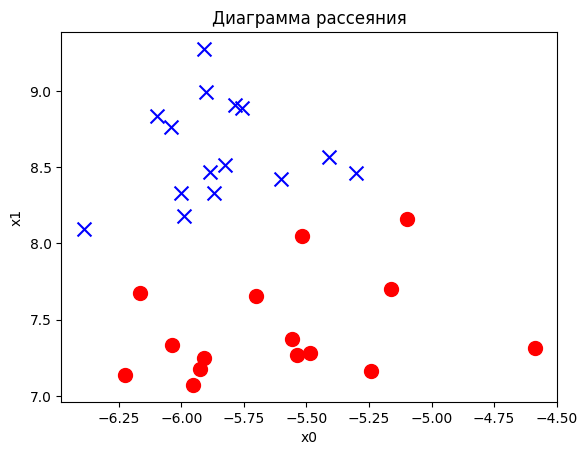

In [235]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [236]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)
svm_linear.coef_, svm_linear.intercept_

(array([[-2.49920793,  6.14683189]]), array([-64.2533988]))

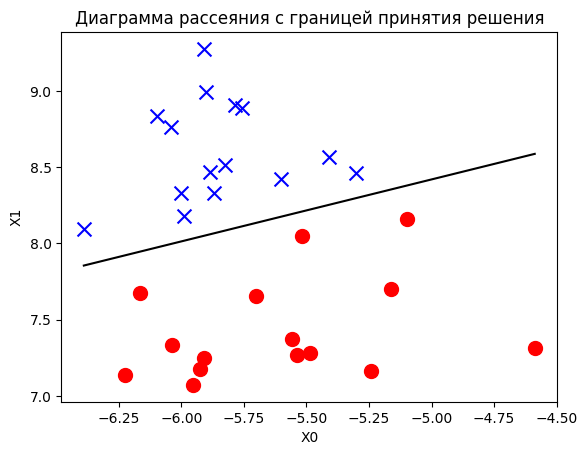

In [237]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [238]:
svm_linear.support_vectors_, svm_linear.support_, svm_linear.n_support_


(array([[-5.51629264,  8.04763857],
        [-5.30025769,  8.46071981],
        [-5.9879581 ,  8.18112559]]),
 array([ 0,  8, 29]),
 array([1, 2]))

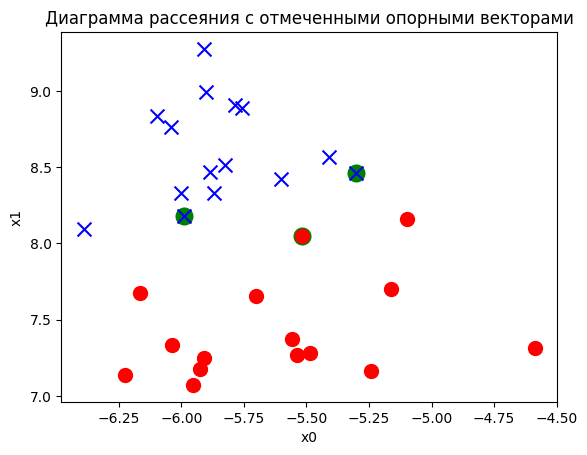

In [239]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

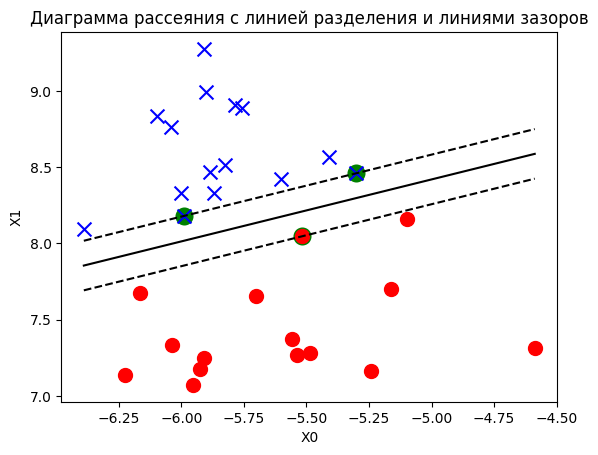

In [240]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

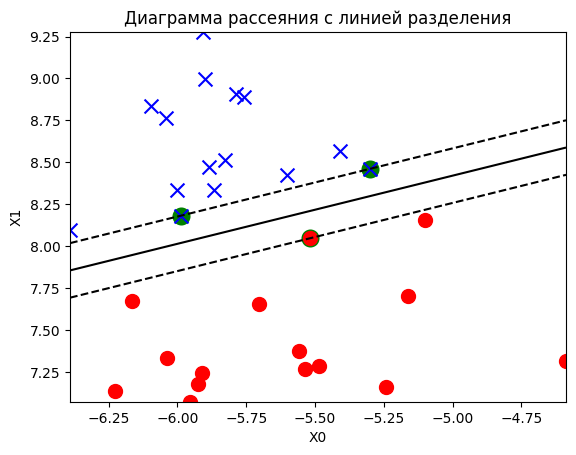

In [241]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [242]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

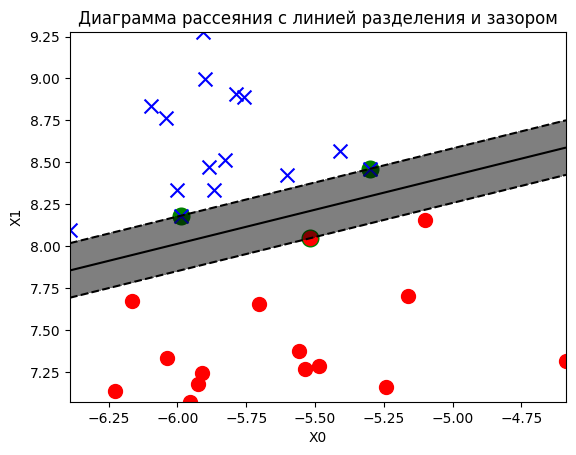

In [243]:
plot_decision_regions(X, y, svm_linear)

In [244]:
y_pred =  svm_linear.predict(X)
metrics.accuracy_score(y, y_pred)

1.0

In [245]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

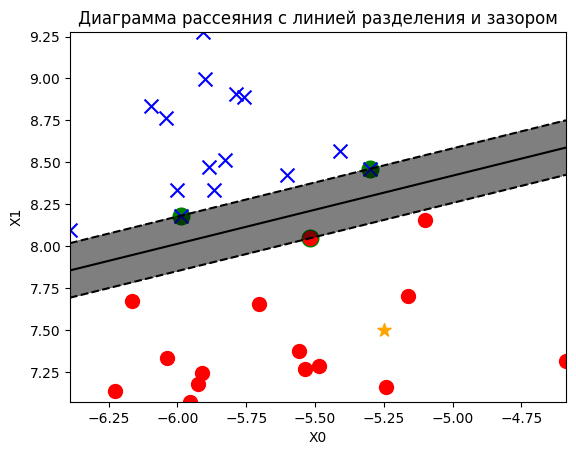

In [246]:
observation_new = [[-5.25, 7.5]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [247]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [248]:
svm_linear.predict(observation_new)

array([0])

# Линейно неразделимые данные с зазором

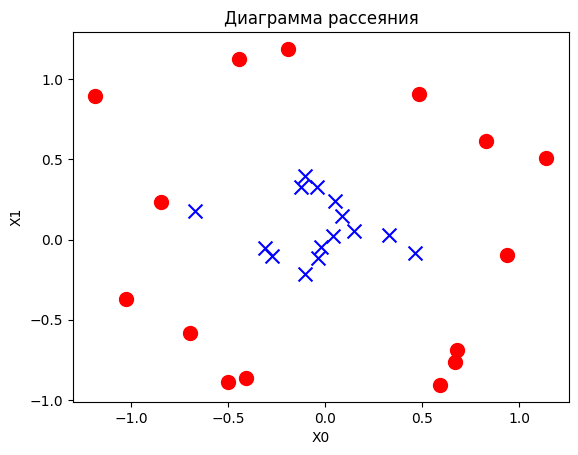

In [249]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

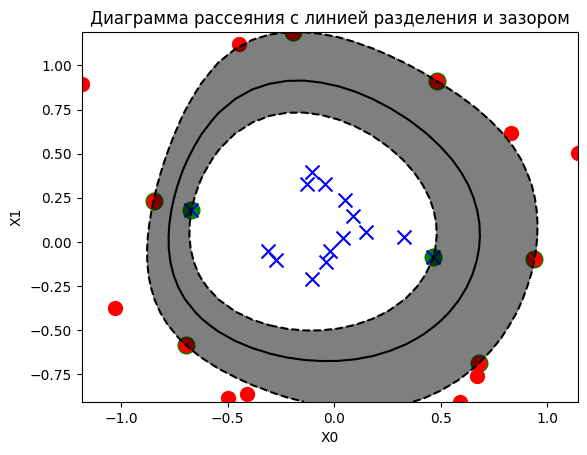

(0.4666666666666667,
 array([[7, 8],
        [8, 7]], dtype=int64))

In [250]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)
metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred)

# Данные без зазора

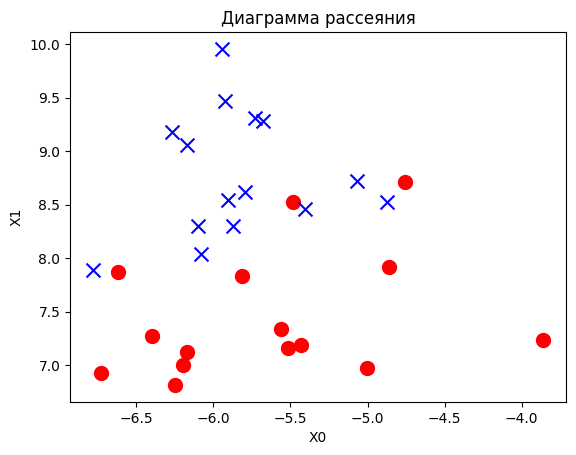

In [251]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

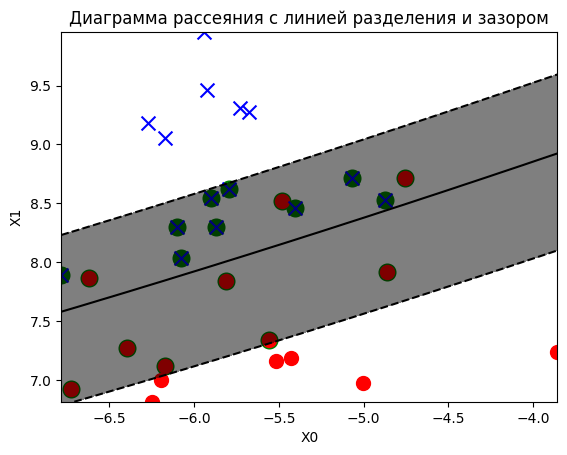

In [252]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)
plot_decision_regions(X, y, svm_poly)

In [253]:
svm_poly.n_support_

array([9, 9])

In [254]:
metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred)

(1.0,
 array([[15,  0],
        [ 0, 15]], dtype=int64))

# Задания для самостоятельного выполнения

##### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

c = 1
0.9666666666666667
[[14  1]
 [ 0 15]]


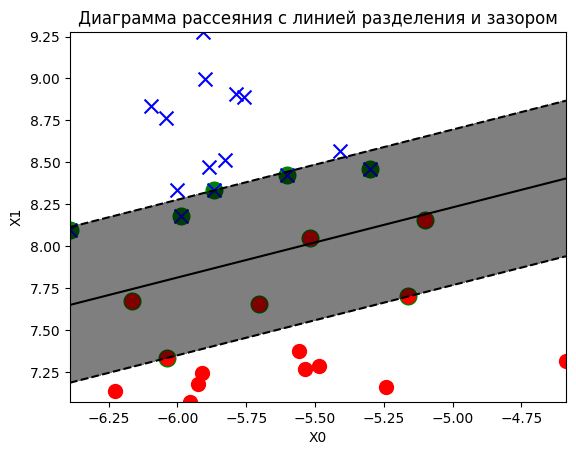

c = 2
1.0
[[15  0]
 [ 0 15]]


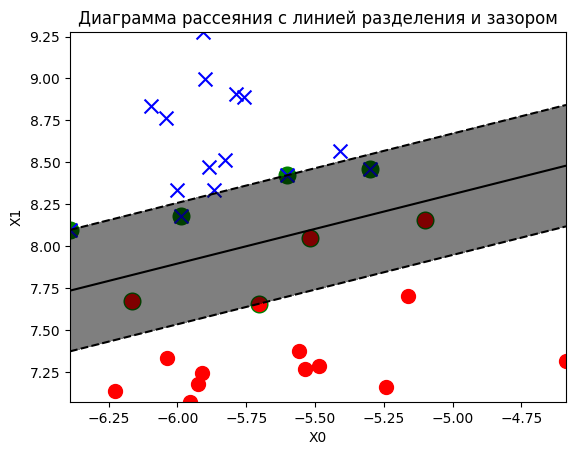

c = 3
1.0
[[15  0]
 [ 0 15]]


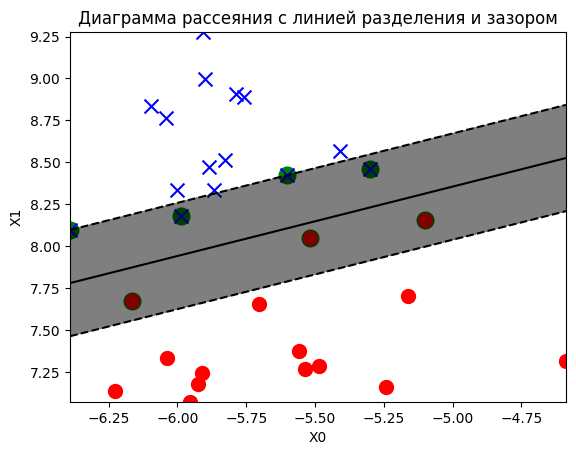

c = 4
1.0
[[15  0]
 [ 0 15]]


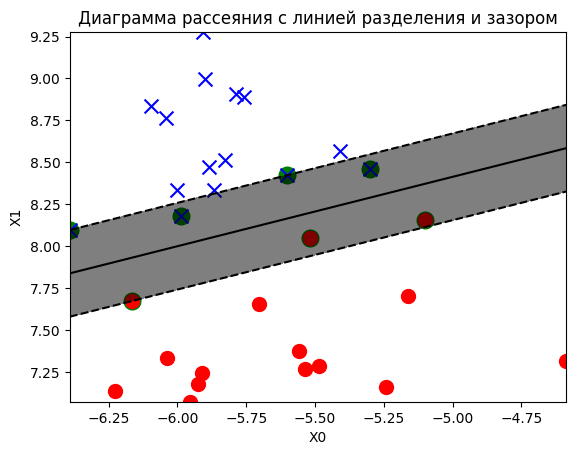

c = 5
1.0
[[15  0]
 [ 0 15]]


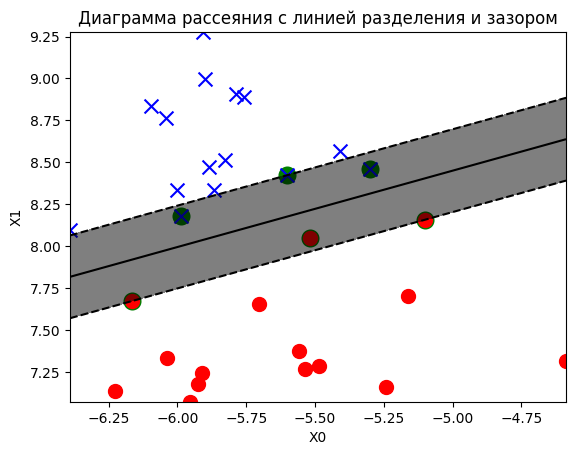

c = 100
1.0
[[15  0]
 [ 0 15]]


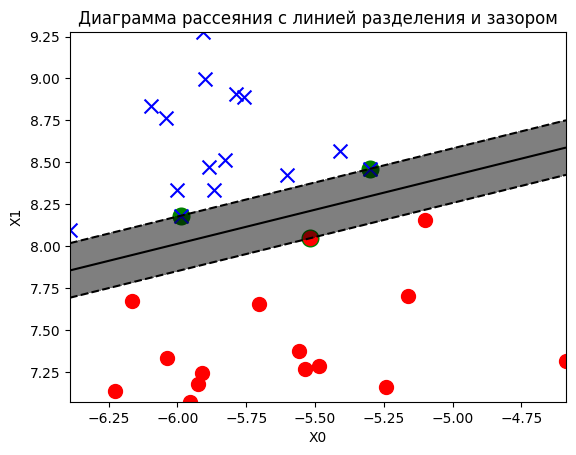

In [255]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
for c in [1, 2, 3, 4, 5, 100]:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X, y)
    y_pred =  svm_linear.predict(X)
    print(f'c = {c}')
    print(metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred), sep='\n')
    plot_decision_regions(X, y, svm_linear)

##### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

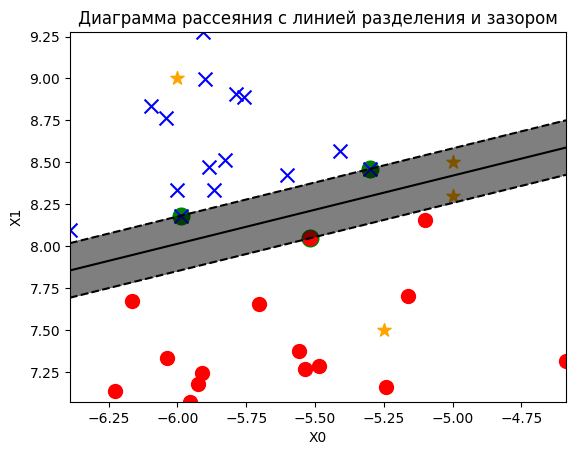

In [256]:
observations_new = [[-6, 9], [-5.25, 7.5], [-5, 8.5], [-5, 8.3]]
for point in observations_new:
    plt.scatter(point[0], point[1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [257]:
svm_linear.decision_function(observations_new), svm_linear.predict(observations_new)

(array([ 6.06333582, -5.03131797,  0.49071194, -0.73865444]),
 array([1, 0, 1, 0]))

##### 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

linear
0.7
[[ 6  9]
 [ 0 15]]


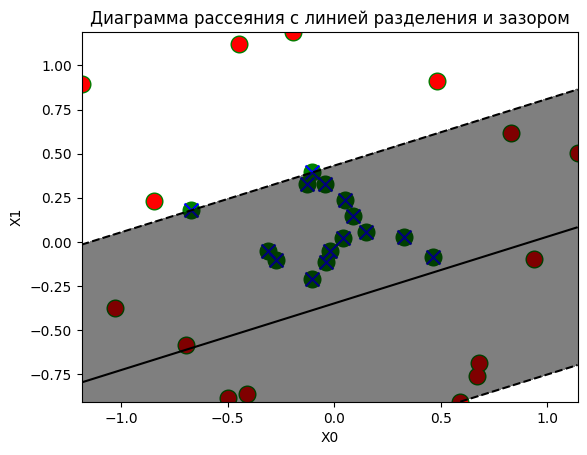

poly
0.7
[[ 6  9]
 [ 0 15]]


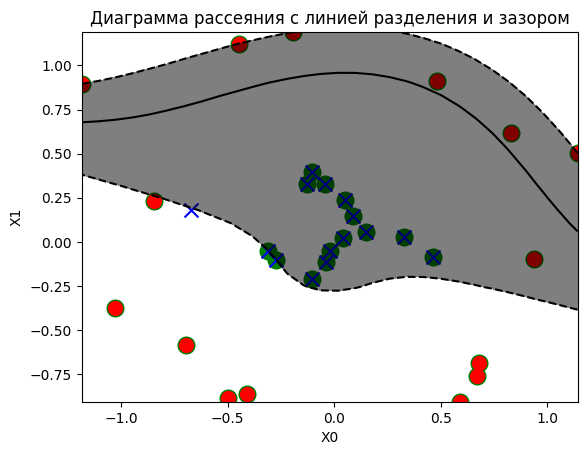

rbf
1.0
[[15  0]
 [ 0 15]]


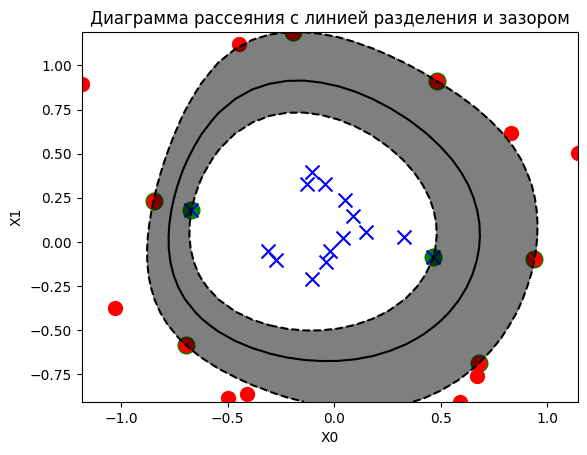

sigmoid
0.5
[[7 8]
 [7 8]]


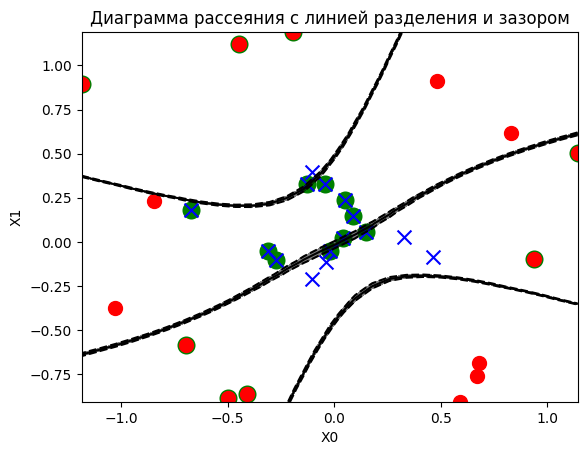

In [258]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm_with_kernels = SVC(kernel=kernel, C=100).fit(X, y)
    y_pred =  svm_with_kernels.predict(X)
    print(kernel, metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred), sep='\n')
    plot_decision_regions(X, y, svm_with_kernels)

##### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.

c = 1
0.8
[[14  1]
 [ 5 10]]


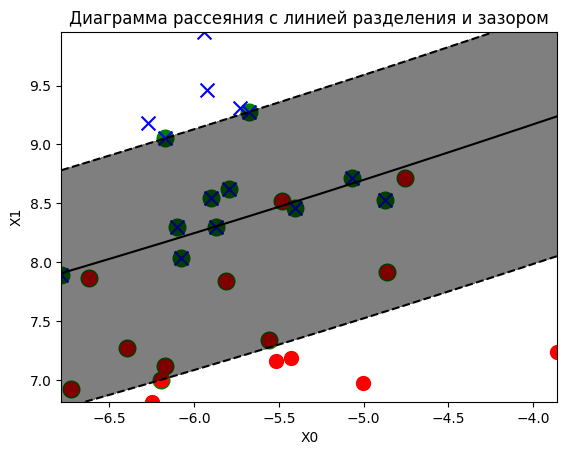

c = 2
0.9
[[12  3]
 [ 0 15]]


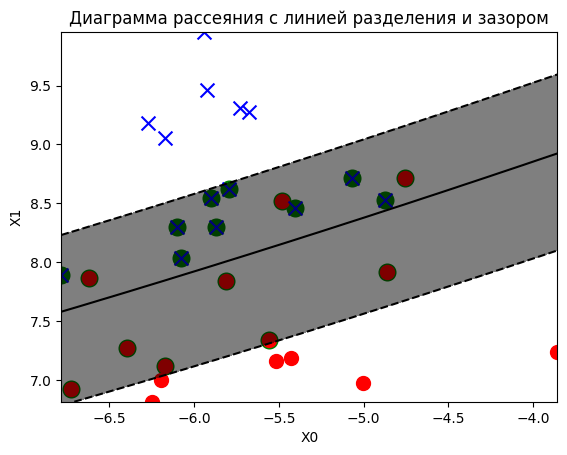

c = 3
0.9
[[12  3]
 [ 0 15]]


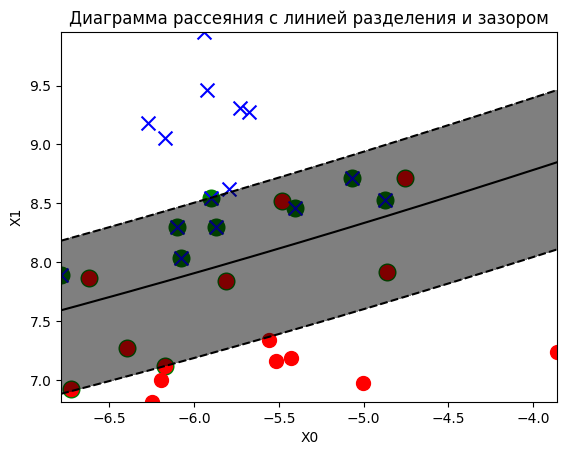

c = 4
0.9
[[12  3]
 [ 0 15]]


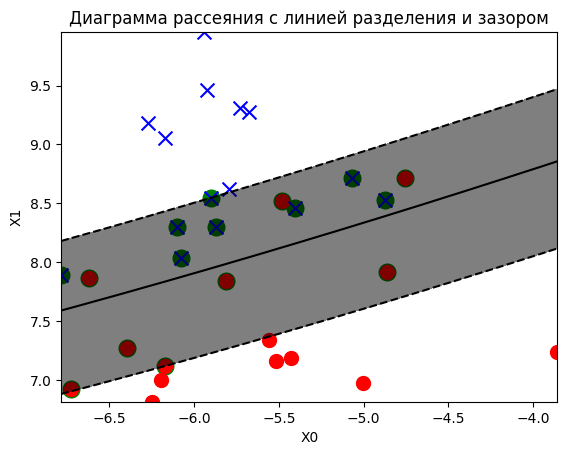

c = 5
0.9
[[12  3]
 [ 0 15]]


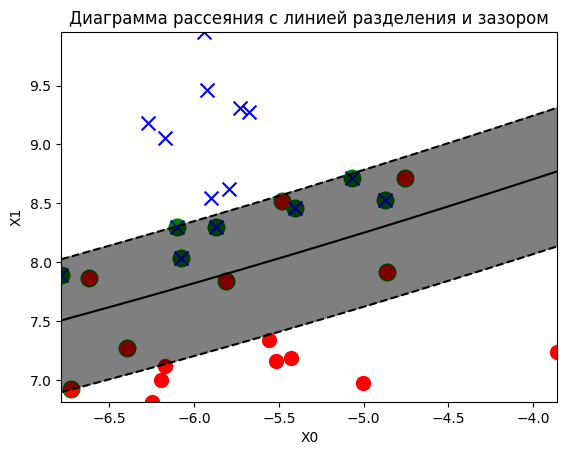

c = 100
0.9
[[12  3]
 [ 0 15]]


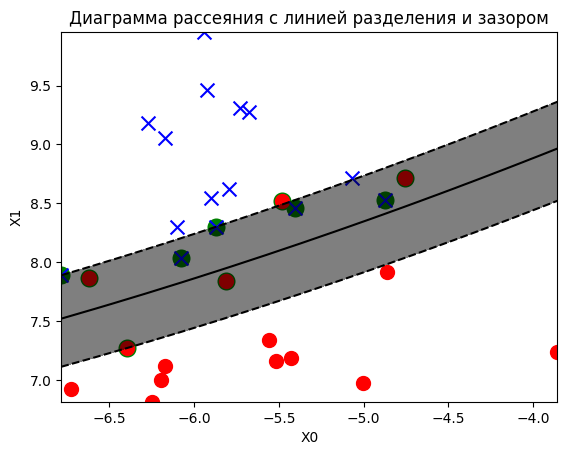

In [259]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)
for c in [1, 2, 3, 4, 5, 100]:
    svm_poly = SVC(kernel='poly', degree=4, C=c).fit(X, y)
    y_pred =  svm_poly.predict(X)
    print(f'c = {c}')
    print(metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred), sep='\n')
    plot_decision_regions(X, y, svm_poly)


##### 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

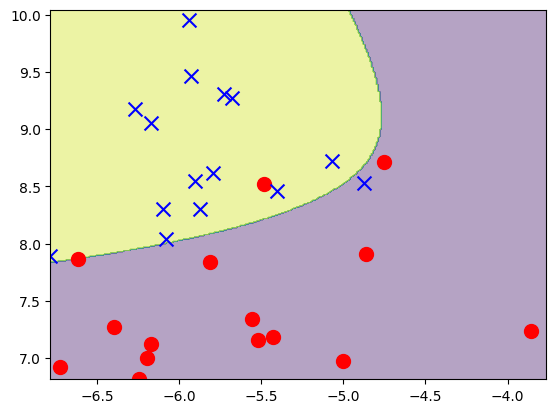

0.9333333333333333

In [260]:
X = pd.DataFrame(X)
y = pd.Series(y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
class_transform = PolynomialFeatures(degree=4, include_bias=False)
X_3 = class_transform.fit_transform(X)
X_3.shape
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

y_pred =  class_3.predict(X_3)
metrics.accuracy_score(y, y_pred)

c:\Users\malna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


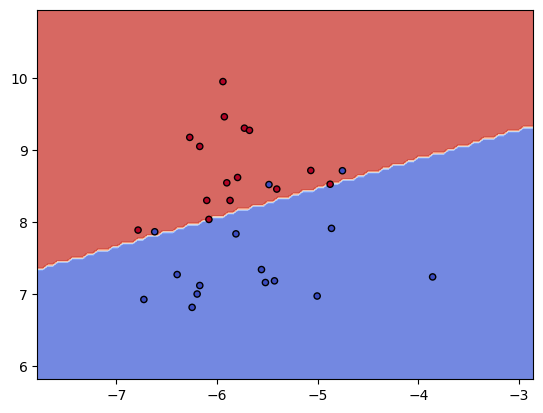

0.9

In [261]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)
lin_SVC = LinearSVC(C=100, max_iter=10000)
lin_SVC.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
    lin_SVC,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8
)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

plt.show()

y_pred =  lin_SVC.predict(X)
metrics.accuracy_score(y, y_pred)

##### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [262]:
X,y = make_classification(n_samples=1000,
                          n_features=5,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=1,
                          random_state=1)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    best_C = 1
    best_accuracy = float('-inf')
    for c in np.append(np.arange(1, 10), np.arange(10, 500, 30)):
        svm_with_kernels = SVC(kernel=kernel, C=c).fit(X, y)
        y_pred =  svm_with_kernels.predict(X)
        if metrics.accuracy_score(y, y_pred) > best_accuracy:
            best_accuracy = metrics.accuracy_score(y, y_pred)
            best_C = c
    svm_with_kernels = SVC(kernel=kernel, C=best_C).fit(X, y)
    y_pred =  svm_with_kernels.predict(X)
    print(kernel, best_C, metrics.accuracy_score(y, y_pred), sep='\n', end='\n\n')

linear
1
0.818

poly
40
0.859

rbf
460
0.981

sigmoid
1
0.655



##### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?


In [263]:
for n in range(10_000, 50_001, 10_000):
    X,y = make_classification(n_samples=n,
                            n_features=5,
                            n_informative=5,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=2,
                            random_state=1)
    start = time.perf_counter()
    svm_with_kernels = SVC(kernel='rbf', C=460).fit(X, y)
    end = time.perf_counter()
    print(n, end-start)

10000 0.8351158000004943
20000 4.044730000000527
30000 6.656907199999296
40000 12.148982299999261
50000 23.451697200000126


##### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор. 

In [264]:
X,y = make_classification(n_samples=100,
                        n_features=4,
                        n_informative=4,
                        n_redundant=0,
                        n_classes=3,
                        class_sep=1,
                        random_state=1)
svm_rbf = SVC(kernel="rbf", C=100).fit(X, y)
y_pred =  svm_rbf.predict(X)
print(metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred), sep='\n')

0.98
[[32  0  2]
 [ 0 33  0]
 [ 0  0 33]]


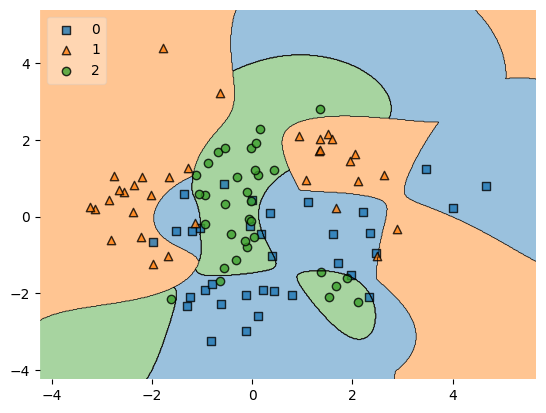

In [265]:
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components = 2)
X_2 = pca.fit_transform(X)
svm_rbf = SVC(kernel="rbf", C=100).fit(X_2, y)

plot_decision_regions(X_2, y, clf=svm_rbf, legend=2)
plt.show()

##### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

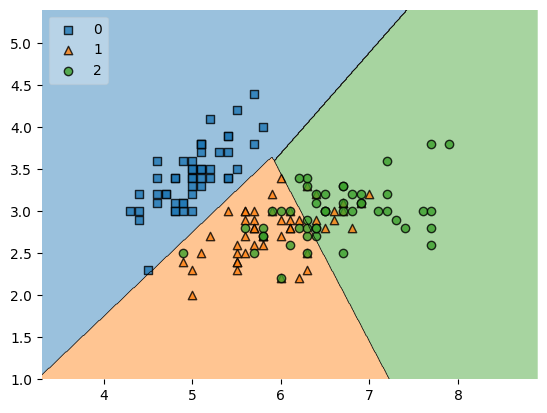

0.82
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


In [266]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
svm_rbf = SVC(kernel="linear", C=10).fit(X, y)
plot_decision_regions(X, y, clf=svm_rbf, legend=2)
plt.show()
y_pred =  svm_rbf.predict(X)
print(metrics.accuracy_score(y, y_pred), metrics.confusion_matrix(y, y_pred), sep='\n')

##### 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [267]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=42)
y = y.astype(int)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    best_C = 1
    best_score = float('-inf')
    for c in np.append(np.arange(1, 10), np.arange(10, 500, 30)):
        svm_SVR = SVR(kernel=kernel, C=c, gamma=0.1, epsilon=0.1).fit(X, y)
        y_pred =  svm_SVR.predict(X)
        if metrics.r2_score(y, y_pred) > best_score:
            best_score = metrics.r2_score(y, y_pred)
            best_C = c
    svm_SVR = SVC(kernel=kernel, C=best_C).fit(X, y)
    y_pred =  svm_SVR.predict(X)
    print(kernel, best_C, metrics.accuracy_score(y, y_pred), sep='\n', end='\n\n')

linear
9
0.11

poly
490
0.17

rbf
100
0.35

sigmoid
70
0.04



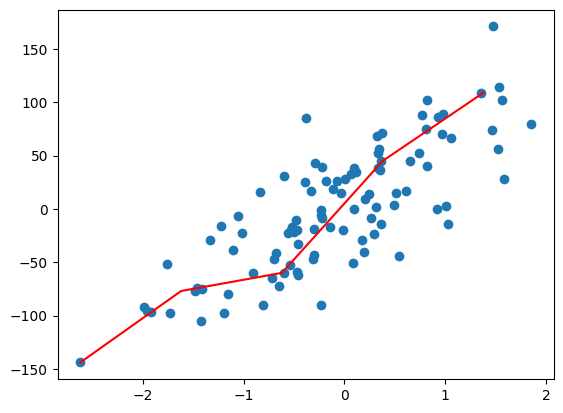

In [268]:
svm_SVR = SVC(kernel='rbf', C=100).fit(X, y)
xx = np.arange(X.min(axis=0), X.max(axis=0))
yy = svm_SVR.predict(pd.DataFrame(xx))

plt.scatter(X, y)
plt.plot(xx, yy, c='r')
plt.show()